# Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import kurtosis, skew
import os
import statsmodels.api as sm


Reading and Cleaning the Data

In [2]:
# Load the dataset
data = pd.read_csv('shopping_behavior_updated.csv')

# Data Cleaning Function
def clean_data(data):
    """
    Clean and prepare the data for analysis.

    Parameters:
    data (pd.DataFrame): The dataframe containing the raw data.

    Returns:
    pd.DataFrame: Cleaned data.
    """
    # Example cleaning steps
    data.dropna(inplace=True)
    data = data[data['Age'] > 0]
    return data

data = clean_data(data)



Displaying Dataset First 10 Rows

In [3]:
def display_head(df, n=10):
    print(df.head(n))
# Display first 10 rows
display_head(data, 10)



   Customer ID  Age Gender Item Purchased     Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse     Clothing                     53   
1            2   19   Male        Sweater     Clothing                     64   
2            3   50   Male          Jeans     Clothing                     73   
3            4   21   Male        Sandals     Footwear                     90   
4            5   45   Male         Blouse     Clothing                     49   
5            6   46   Male       Sneakers     Footwear                     20   
6            7   63   Male          Shirt     Clothing                     85   
7            8   27   Male         Shorts     Clothing                     34   
8            9   26   Male           Coat    Outerwear                     97   
9           10   57   Male        Handbag  Accessories                     31   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       G

Checking Missing Values

In [4]:
# Function to check for missing values
def check_missing_values(df):
    print(df.isnull().sum())
    
check_missing_values(data)

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


Checking Duplicates Values

In [5]:
# Function to check for duplicate values
def check_duplicate_values(df):
    print(df.duplicated().sum())

check_duplicate_values(data)

0


Deacribing Dataset

In [6]:
# Function to describe the dataset
def describe_dataset(df):
    print(df.describe().T)

describe_dataset(data)

                        count         mean          std   min     25%     50%  \
Customer ID            3900.0  1950.500000  1125.977353   1.0  975.75  1950.5   
Age                    3900.0    44.068462    15.207589  18.0   31.00    44.0   
Purchase Amount (USD)  3900.0    59.764359    23.685392  20.0   39.00    60.0   
Review Rating          3900.0     3.749949     0.716223   2.5    3.10     3.7   
Previous Purchases     3900.0    25.351538    14.447125   1.0   13.00    25.0   

                           75%     max  
Customer ID            2925.25  3900.0  
Age                      57.00    70.0  
Purchase Amount (USD)    81.00   100.0  
Review Rating             4.40     5.0  
Previous Purchases       38.00    50.0  


Statistical Analysis

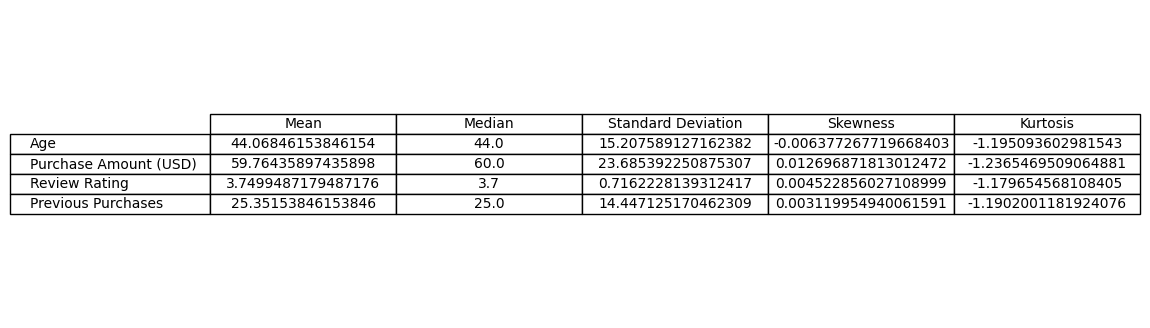

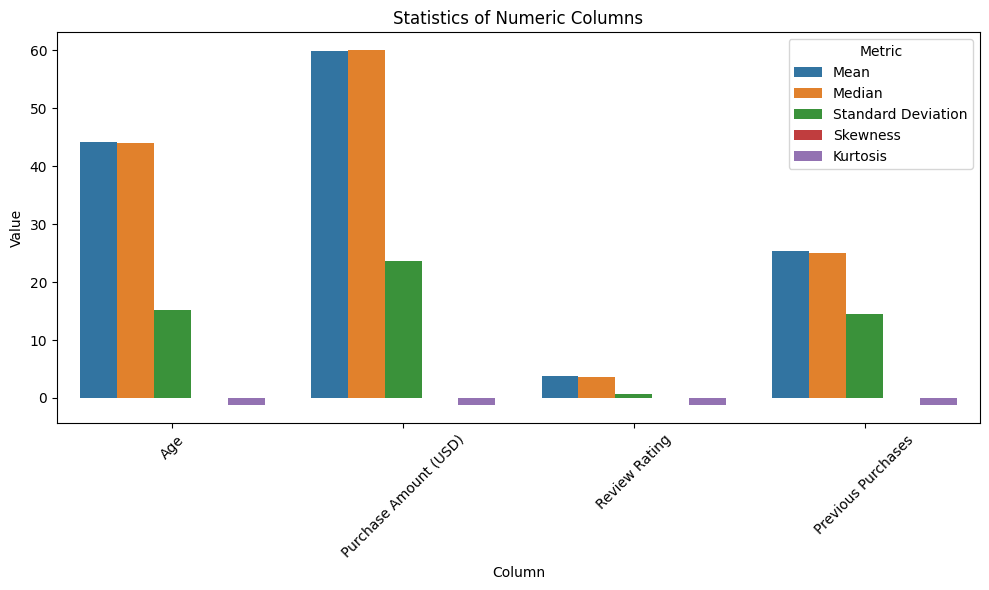

In [7]:
# Function to extract numerical columns and calculate statistics
def calculate_statistics(df):
    numerical_df = df.select_dtypes(include=['int', 'float']).drop('Customer ID', axis=1)
    statistics = {
        'Mean': numerical_df.mean(),
        'Median': numerical_df.median(),
        'Standard Deviation': numerical_df.std(),
        'Skewness': numerical_df.apply(skew),
        'Kurtosis': numerical_df.apply(kurtosis)
    }
    statistics_df = pd.DataFrame(statistics)
    return statistics_df

# Function to plot statistics table
def plot_statistics_table(statistics_df):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=statistics_df.values,
                     colLabels=statistics_df.columns,
                     rowLabels=statistics_df.index,
                     cellLoc='center',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.savefig("statistics_table.png", bbox_inches='tight', dpi=300)
    plt.show()

# Function to plot bar chart of statistics
def plot_statistics_bar(statistics_df):
    # Reset index to turn the index into a column
    statistics_df.reset_index(inplace=True)

    # Melt the DataFrame
    melted_df = statistics_df.melt(id_vars='index', var_name='Statistic', value_name='Value')

    # Plot the statistics
    plt.figure(figsize=(10, 6))
    sns.barplot(x='index', y='Value', hue='Statistic', data=melted_df)
    plt.title('Statistics of Numeric Columns')
    plt.xlabel('Column')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()

# Calculate statistics and plot
statistics_df = calculate_statistics(data)
plot_statistics_table(statistics_df)
plot_statistics_bar(statistics_df)

# Visulization

    Plot a histogram of a Age Distribution


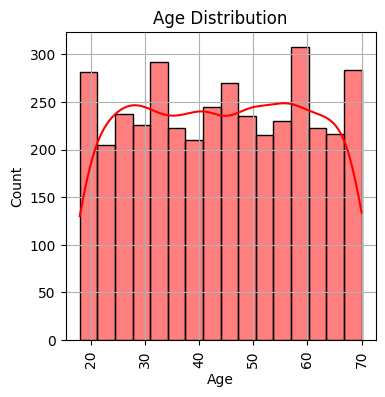

In [8]:
# Visualizations
def plot_histogram(data):
    """
    Plot a histogram of a specified column.

    Parameters:
    data (pd.DataFrame): The dataframe containing the data.

    Returns:
    None
    """
    plt.figure(figsize=(4, 4))
    sns.histplot(data=data, x='Age', kde=True, color='red')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()
    
plot_histogram(data)


    Plot a line chart showing the relationship between seasons and average purchase amounts.


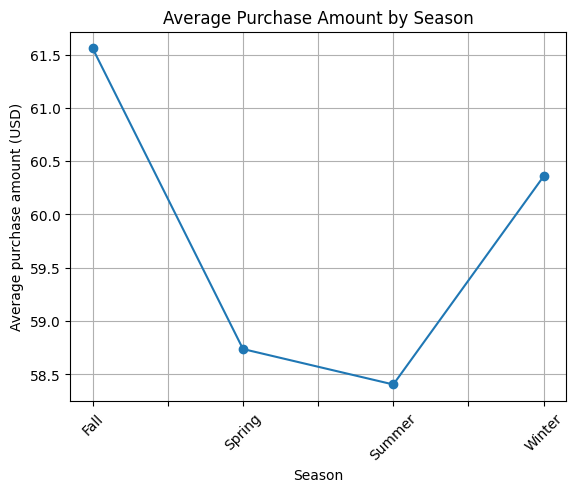

In [9]:
def plot_line_chart(data):
    """
    Plot a line chart showing the relationship between seasons and average purchase amounts.

    Parameters:
    data (pd.DataFrame): The dataframe containing the data.

    Returns:
    None
    """
    data.plot(kind='line', marker='o')
    plt.title('Average Purchase Amount by Season')
    plt.xlabel('Season')
    plt.ylabel('Average purchase amount (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

seasonal_purchase_amount = data.groupby('Season')['Purchase Amount (USD)'].mean()
plot_line_chart(seasonal_purchase_amount)


    Plot a heatmap showing correlation between numerical features.


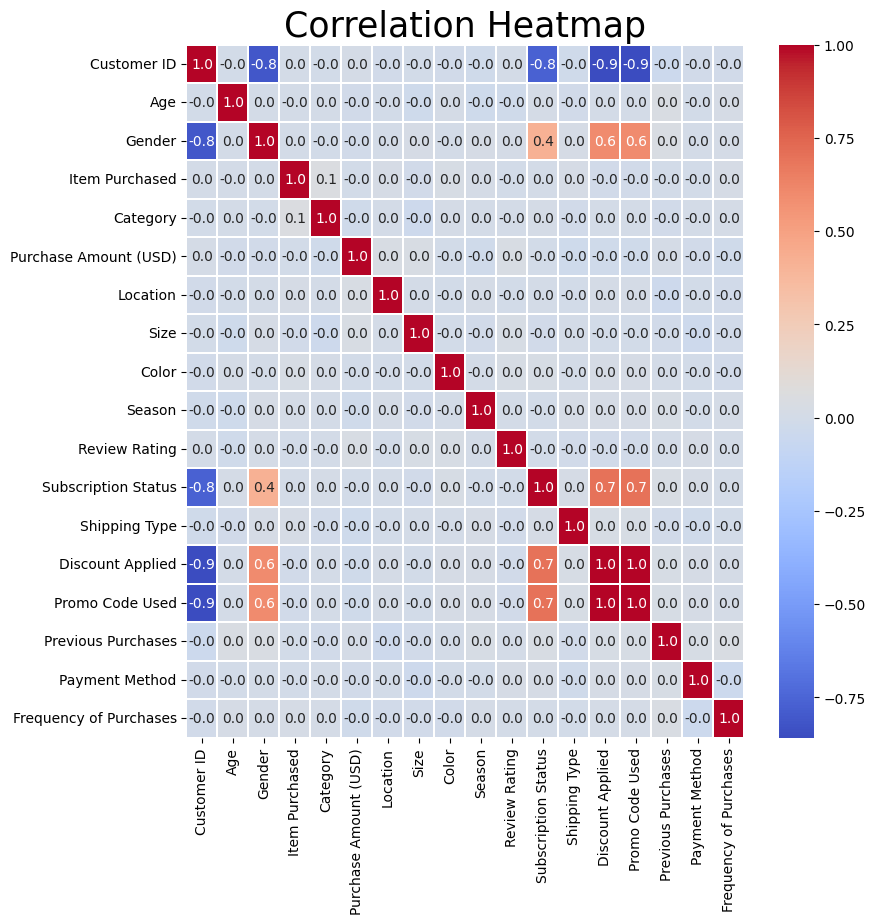

In [10]:
def encode_categorical_columns(df):
    """
    Label encode the categorical columns in the dataframe.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.

    Returns:
    pd.DataFrame: Dataframe with encoded categorical columns.
    """
    categorical_df = df.select_dtypes(include=['object', 'category'])
    label_encoder = LabelEncoder()
    encoded_df = df.copy()
    for col in categorical_df.columns:
        encoded_df[col] = label_encoder.fit_transform(df[col])
    return encoded_df

def plot_heatmap(data):
    """
    Plot a heatmap showing correlation between numerical features.

    Parameters:
    data (pd.DataFrame): The dataframe containing the data.

    Returns:
    None
    """
    correlation_matrix = data.corr()
    plt.figure(figsize=(9, 9))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
    plt.title('Correlation Heatmap', fontsize=25)
    plt.show()
    
# Label encode categorical columns
encoded_df = encode_categorical_columns(data)
plot_heatmap(encoded_df)


  box plot to visualize the distribution of review ratings by gender.


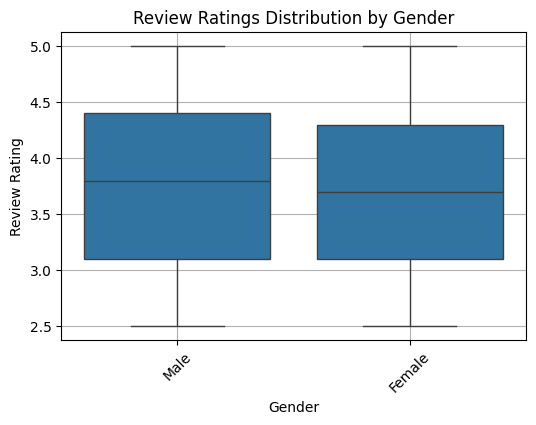

In [11]:
def box_plot(data):
    """
    Create a box plot to visualize the distribution of review ratings by gender.

    Parameters:
    data (pd.DataFrame): The dataframe containing the data.

    Returns:
    None
    """
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Gender', y='Review Rating', data=data)
    plt.title('Review Ratings Distribution by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Review Rating')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

box_plot(data)


# CLustering and Fitting

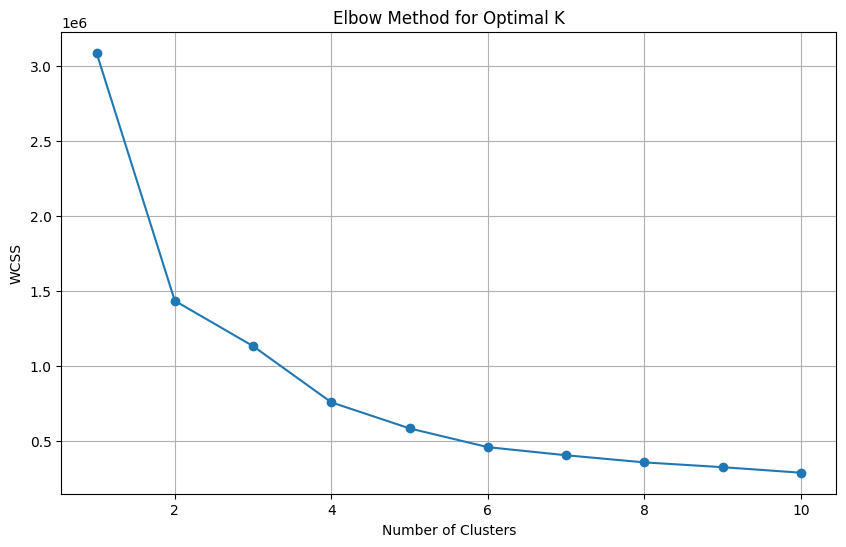

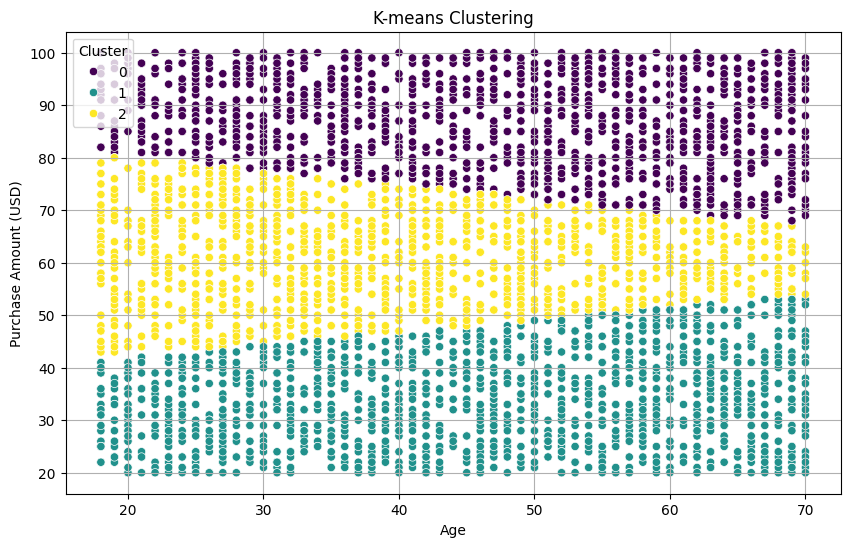

In [12]:
# Clustering using K-means
def kmeans_clustering(data):
    """
    Perform K-means clustering on the dataset and determine the optimal number of clusters using the elbow method.

    Parameters:
    data (pd.DataFrame): The dataframe containing the data.

    Returns:
    None
    """
    X = data[['Age', 'Purchase Amount (USD)']]

    # Elbow Method to find the optimal number of clusters
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()

    # Fit K-means with the optimal number of clusters (assumed 3 for the example)
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=0)
    data['Cluster'] = kmeans.fit_predict(X)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Cluster', data=data, palette='viridis')
    plt.title('K-means Clustering')
    plt.xlabel('Age')
    plt.ylabel('Purchase Amount (USD)')
    plt.grid(True)
    plt.show()

kmeans_clustering(data)



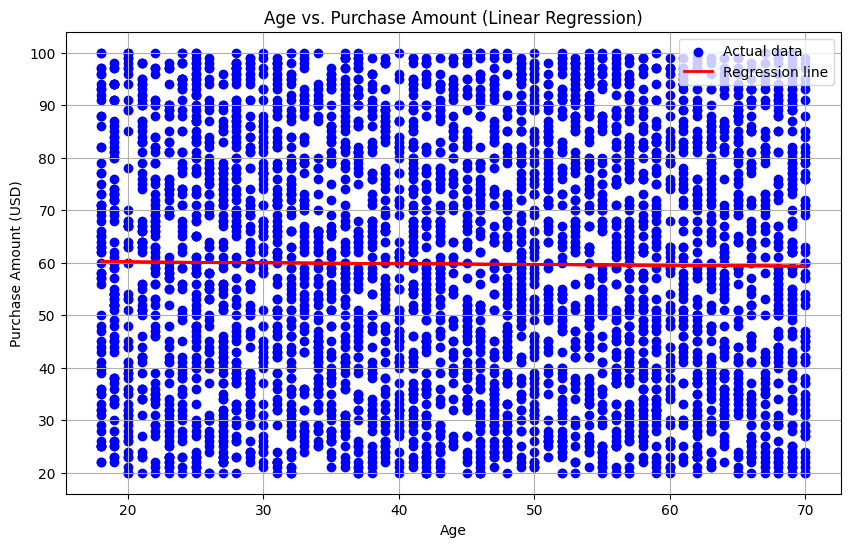

Coefficients: [-0.01623454]
Intercept: 60.479790068321016
Mean Squared Error: 560.7930223438265


In [13]:
# Regression Analysis
def regression_analysis(data):
    """
    Perform linear regression to investigate the relationship between Age and Purchase Amount.

    Parameters:
    data (pd.DataFrame): The dataframe containing the data.

    Returns:
    None
    """
    X = data[['Age']]
    y = data['Purchase Amount (USD)']

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
    plt.title('Age vs. Purchase Amount (Linear Regression)')
    plt.xlabel('Age')
    plt.ylabel('Purchase Amount (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print regression details
    print('Coefficients:', model.coef_)
    print('Intercept:', model.intercept_)
    print('Mean Squared Error:', mean_squared_error(y, y_pred))

regression_analysis(data)



Confidense Interval 

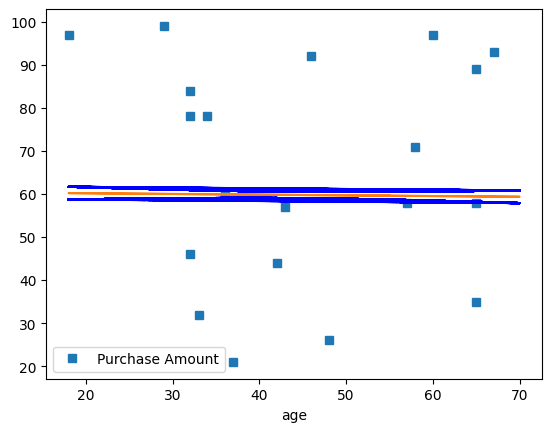

In [14]:
# Function to generate random indices for regplot
def generate_random_indices(encoded_df):
    return np.random.choice(np.arange(1, 3000), size=20, replace=False)

# Function to plot regression with confidence intervals
def plot_regression_with_confidence_intervals(X_feature, y_feature, random_indices):
    df_ols = pd.DataFrame({'age': X_feature.values.flatten(), 'Purchase Amount': y_feature.values.flatten()})
    df_ols['age'] = df_ols['age'].astype(float)
    X = sm.add_constant(df_ols['age'].values)
    ols_model = sm.OLS(df_ols['Purchase Amount'].values, X)
    est = ols_model.fit()
    out = est.conf_int(alpha=0.05, cols=None)
    random_df = df_ols.iloc[random_indices]
    fig, ax = plt.subplots()
    random_df.plot(x='age', y='Purchase Amount', linestyle='None', marker='s', ax=ax)
    y_pred = est.predict(X)
    x_pred = df_ols.age.values
    ax.plot(x_pred, y_pred)
    pred = est.get_prediction(X).summary_frame()
    ax.plot(x_pred, pred['mean_ci_lower'], linestyle='--', color='blue')
    ax.plot(x_pred, pred['mean_ci_upper'], linestyle='--', color='blue')

 # Linear regression analysis
X_feature = encoded_df[['Age']]
y_feature = encoded_df[['Purchase Amount (USD)']]

# Plot regression with confidence intervals
random_indices = generate_random_indices(encoded_df)
plot_regression_with_confidence_intervals(X_feature, y_feature, random_indices)